In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
from citipy import citipy

In [17]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [18]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [19]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [20]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mitsamiouli
Processing Record 2 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 1 | rab
City not found. Skipping...
Processing Record 4 of Set 1 | airai
Processing Record 5 of Set 1 | puerto escondido
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | bengkulu
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | cayenne
Processing Record 13 of Set 1 | gat
Processing Record 14 of Set 1 | campo largo
Processing Record 15 of Set 1 | khormuj
City not found. Skipping...
Processing Record 16 of Set 1 | berbera
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | crossville
Processing Record 20 of Set 1 | sikasso
Processing Record 21 of Set 1 | puerto ayora
Proce

Processing Record 36 of Set 4 | cabo san lucas
Processing Record 37 of Set 4 | tocopilla
Processing Record 38 of Set 4 | ribeira grande
Processing Record 39 of Set 4 | kirovskaya
Processing Record 40 of Set 4 | san patricio
Processing Record 41 of Set 4 | leningradskiy
Processing Record 42 of Set 4 | puerto montt
Processing Record 43 of Set 4 | saskylakh
Processing Record 44 of Set 4 | sitka
Processing Record 45 of Set 4 | lebu
Processing Record 46 of Set 4 | bucyrus
Processing Record 47 of Set 4 | kijang
Processing Record 48 of Set 4 | mocambique
City not found. Skipping...
Processing Record 49 of Set 4 | verkh-usugli
Processing Record 50 of Set 4 | korla
Processing Record 1 of Set 5 | shingu
Processing Record 2 of Set 5 | rialma
Processing Record 3 of Set 5 | mochicahui
Processing Record 4 of Set 5 | kalispell
Processing Record 5 of Set 5 | walvis bay
Processing Record 6 of Set 5 | juneau
Processing Record 7 of Set 5 | nanortalik
Processing Record 8 of Set 5 | mahebourg
Processing Re

Processing Record 30 of Set 8 | lufkin
Processing Record 31 of Set 8 | det udom
Processing Record 32 of Set 8 | yuryevets
Processing Record 33 of Set 8 | la rioja
Processing Record 34 of Set 8 | santarem
Processing Record 35 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 36 of Set 8 | malanje
Processing Record 37 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 38 of Set 8 | kutum
Processing Record 39 of Set 8 | weligama
Processing Record 40 of Set 8 | kharp
Processing Record 41 of Set 8 | gorom-gorom
Processing Record 42 of Set 8 | southbridge
Processing Record 43 of Set 8 | kieta
Processing Record 44 of Set 8 | broome
Processing Record 45 of Set 8 | sobolevo
Processing Record 46 of Set 8 | ningan
City not found. Skipping...
Processing Record 47 of Set 8 | penarth
Processing Record 48 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 49 of Set 8 | galgani
City not found. Skipping...
Processing Record 50 of Set 8 | bokspits

Processing Record 17 of Set 12 | zhangye
Processing Record 18 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 19 of Set 12 | muswellbrook
Processing Record 20 of Set 12 | port macquarie
Processing Record 21 of Set 12 | madras
Processing Record 22 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 23 of Set 12 | teeli
Processing Record 24 of Set 12 | vardo
Processing Record 25 of Set 12 | olenegorsk
Processing Record 26 of Set 12 | firovo
Processing Record 27 of Set 12 | vrangel
Processing Record 28 of Set 12 | calvia
Processing Record 29 of Set 12 | erzin
Processing Record 30 of Set 12 | nata
Processing Record 31 of Set 12 | zhezkazgan
Processing Record 32 of Set 12 | usinsk
Processing Record 33 of Set 12 | abalak
Processing Record 34 of Set 12 | bekovo
Processing Record 35 of Set 12 | palembang
Processing Record 36 of Set 12 | khasan
Processing Record 37 of Set 12 | misratah
Processing Record 38 of Set 12 | ayorou
Processing Record 39 of Set 12

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mitsamiouli,-11.3847,43.2844,75.02,72,6,5.59,KM,2022-07-21 22:47:46
1,Airai,-8.9266,125.4092,57.38,85,98,3.78,TL,2022-07-21 22:45:45
2,Puerto Escondido,15.8500,-97.0667,84.52,76,99,3.27,MX,2022-07-21 22:44:47
3,Kapaa,22.0752,-159.3190,84.52,68,40,16.11,US,2022-07-21 22:44:28
4,Rikitea,-23.1203,-134.9692,74.10,80,94,23.02,PF,2022-07-21 22:44:28
5,Avarua,-21.2078,-159.7750,73.45,78,75,16.11,CK,2022-07-21 22:44:20
6,Kodiak,57.7900,-152.4072,53.11,87,100,4.61,US,2022-07-21 22:45:16
7,Bengkulu,-3.8004,102.2655,74.66,90,82,4.88,ID,2022-07-21 22:47:07
8,Butaritari,3.0707,172.7902,81.48,73,57,5.41,KI,2022-07-21 22:44:39
9,Cayenne,4.9333,-52.3333,83.08,1,20,3.44,GF,2022-07-21 22:47:47


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mitsamiouli,KM,2022-07-21 22:47:46,-11.3847,43.2844,75.02,72,6,5.59
1,Airai,TL,2022-07-21 22:45:45,-8.9266,125.4092,57.38,85,98,3.78
2,Puerto Escondido,MX,2022-07-21 22:44:47,15.8500,-97.0667,84.52,76,99,3.27
3,Kapaa,US,2022-07-21 22:44:28,22.0752,-159.3190,84.52,68,40,16.11
4,Rikitea,PF,2022-07-21 22:44:28,-23.1203,-134.9692,74.10,80,94,23.02
5,Avarua,CK,2022-07-21 22:44:20,-21.2078,-159.7750,73.45,78,75,16.11
6,Kodiak,US,2022-07-21 22:45:16,57.7900,-152.4072,53.11,87,100,4.61
7,Bengkulu,ID,2022-07-21 22:47:07,-3.8004,102.2655,74.66,90,82,4.88
8,Butaritari,KI,2022-07-21 22:44:39,3.0707,172.7902,81.48,73,57,5.41
9,Cayenne,GF,2022-07-21 22:47:47,4.9333,-52.3333,83.08,1,20,3.44


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

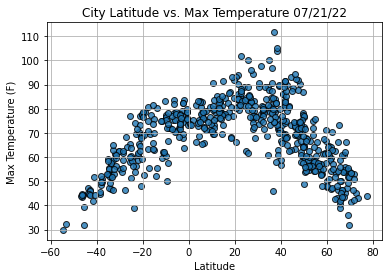

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

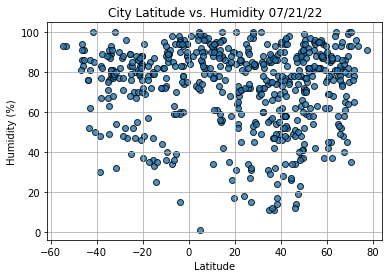

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

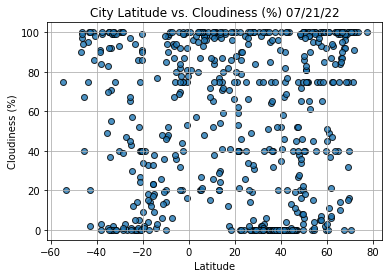

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

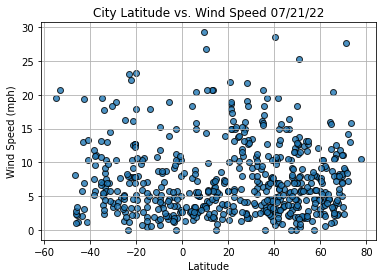

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [32]:
index13 = city_data_df.loc[13]
index13

City                         Chuy
Country                        UY
Date          2022-07-21 22:47:49
Lat                      -33.6971
Lng                      -53.4616
Max Temp                    51.85
Humidity                       89
Cloudiness                     92
Wind Speed                   6.29
Name: 13, dtype: object

In [33]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
566     True
567     True
568     True
569     True
570    False
Name: Lat, Length: 571, dtype: bool

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Puerto Escondido,MX,2022-07-21 22:44:47,15.8500,-97.0667,84.52,76,99,3.27
3,Kapaa,US,2022-07-21 22:44:28,22.0752,-159.3190,84.52,68,40,16.11
6,Kodiak,US,2022-07-21 22:45:16,57.7900,-152.4072,53.11,87,100,4.61
8,Butaritari,KI,2022-07-21 22:44:39,3.0707,172.7902,81.48,73,57,5.41
9,Cayenne,GF,2022-07-21 22:47:47,4.9333,-52.3333,83.08,1,20,3.44


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

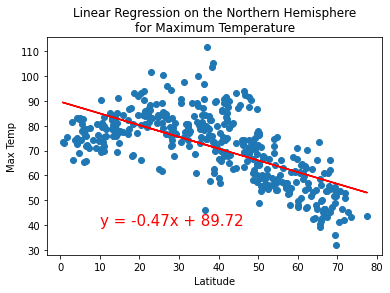

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' "\n"
                       'for Maximum Temperature', 'Max Temp',(10,40))

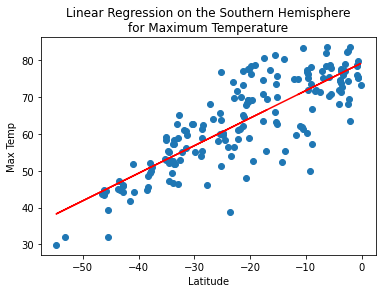

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' "\n"
                        'for Maximum Temperature', 'Max Temp',(-50,90))

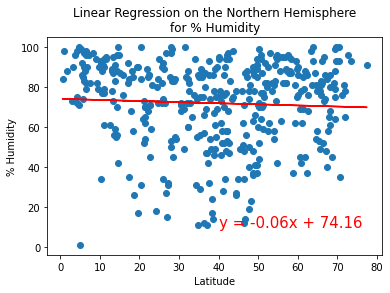

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' "\n"
                        'for % Humidity', '% Humidity',(40,10))

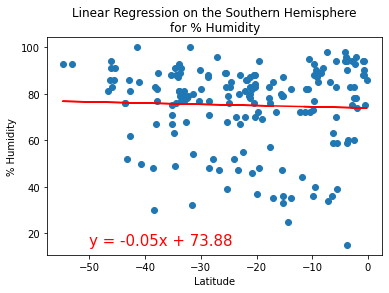

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' "\n"
                        'for % Humidity', '% Humidity',(-50,15))

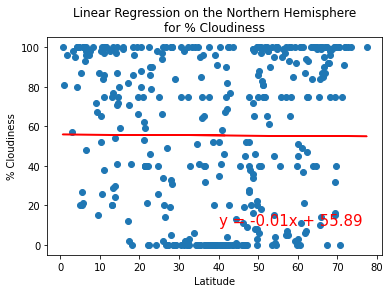

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' "\n"
                        'for % Cloudiness', '% Cloudiness',(40,10))

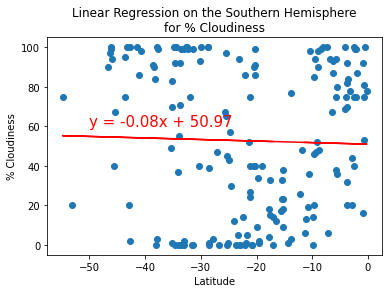

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' "\n"
                        'for % Cloudiness', '% Cloudiness',(-50,60))


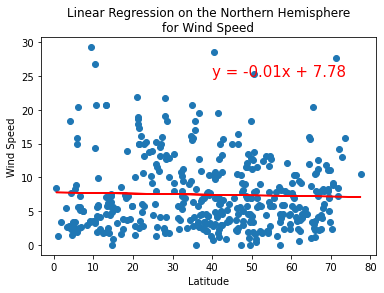

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' "\n"
                        'for Wind Speed', 'Wind Speed',(40,25))

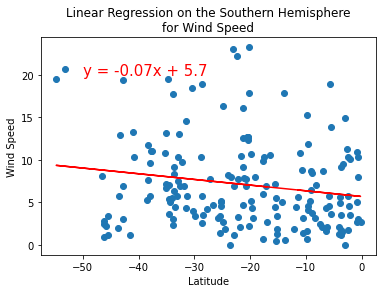

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' "\n"
                        'for Wind Speed', 'Wind Speed',(-50,20))